# Importing Libraries


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

# Data set loading
Dataset is loaded as a CSV file

In [ ]:
df=pd.read_csv('Mall_Customers.csv')

# Preprocessing

In [ ]:
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Missing or null values in the dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Finding Outliers from the dataset


In [ ]:
z_scores_income = np.abs(stats.zscore(df['Annual Income (k$)']))
z_scores_score = np.abs(stats.zscore(df['Spending Score (1-100)']))

In [ ]:
z_score_threshold = 2

outliers_income = df[z_scores_income > z_score_threshold]
outliers_score = df[z_scores_score > z_score_threshold]

Positive outliers in the income column

In [ ]:
print(outliers_income)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
192         193    Male   33                 113                       8
193         194  Female   38                 113                      91
194         195  Female   47                 120                      16
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83


No outliers in the Spending score column

In [ ]:
print(outliers_score)

Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


# Visualizing outliers (Annual Income) using box plot


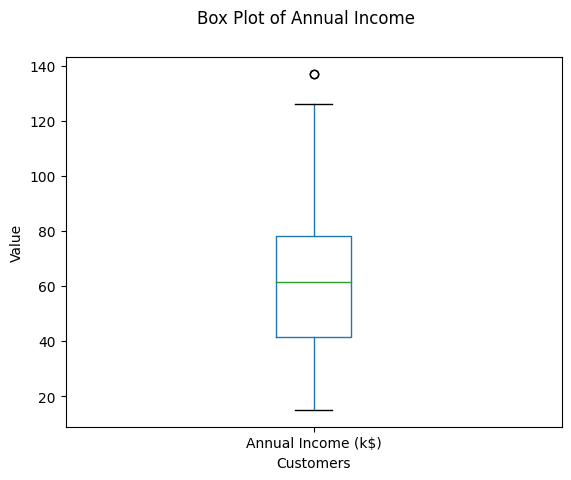

In [ ]:
df.boxplot(column=['Annual Income (k$)'], grid=False)
plt.suptitle('Box Plot of Annual Income')
plt.xlabel('Customers')
plt.ylabel('Value')
plt.show()

In [ ]:
#changing column name
df.rename(columns={'Genre':'Gender'},inplace=1)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# making male as 1 and female as 0
BinGen = {"Male":1,"Female":0}
df['Gender']=[BinGen[g] for g in df['Gender']]

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
print(df.to_markdown())

|     |   CustomerID |   Gender |   Age |   Annual Income (k$) |   Spending Score (1-100) |
|----:|-------------:|---------:|------:|---------------------:|-------------------------:|
|   0 |            1 |        1 |    19 |                   15 |                       39 |
|   1 |            2 |        1 |    21 |                   15 |                       81 |
|   2 |            3 |        0 |    20 |                   16 |                        6 |
|   3 |            4 |        0 |    23 |                   16 |                       77 |
|   4 |            5 |        0 |    31 |                   17 |                       40 |
|   5 |            6 |        0 |    22 |                   17 |                       76 |
|   6 |            7 |        0 |    35 |                   18 |                        6 |
|   7 |            8 |        0 |    23 |                   18 |                       94 |
|   8 |            9 |        1 |    64 |                   19 |                

# Data Validation
Ensure the data conforms to expected data types and ranges

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


# Visualization

In [ ]:
age_count=df['Age']

In [ ]:
age_count.value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

In [ ]:
counts=df['Age'].value_counts().values
counts

array([11,  9,  8,  8,  7,  7,  6,  6,  6,  6,  6,  6,  5,  5,  5,  5,  5,
        5,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1])

Text(0, 0.5, 'Count')

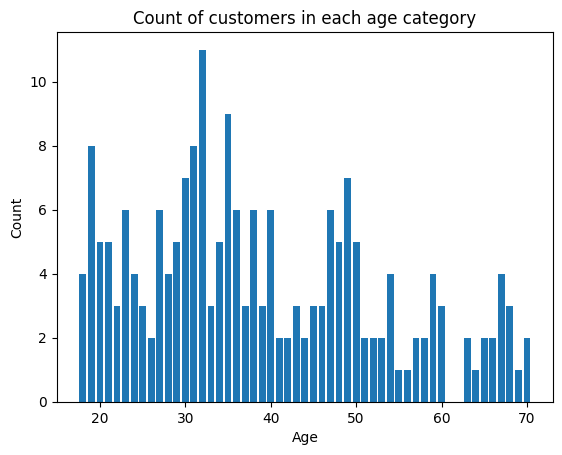

In [ ]:
x=df['Age'].value_counts().index
y=counts
plt.bar(x,y)
plt.title("Count of customers in each age category")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, 'Spending Score')

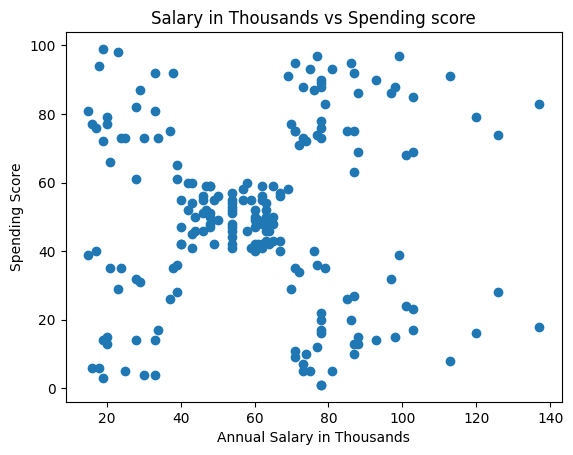

In [ ]:
x=df['Annual Income (k$)']
y=df['Spending Score (1-100)']
plt.scatter(x,y)
plt.title("Salary in Thousands vs Spending score")
plt.xlabel("Annual Salary in Thousands")
plt.ylabel("Spending Score")

Text(0, 0.5, 'Spending Score')

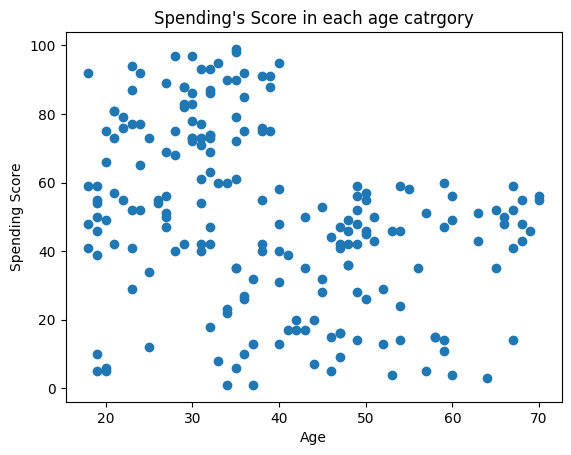

In [ ]:
x=df['Age']
y=df['Spending Score (1-100)']
plt.scatter(x,y)
plt.title("Spending's Score in each age catrgory")
plt.xlabel('Age')
plt.ylabel('Spending Score')

Text(0.5, 1.0, 'Age Vs Annual Income($)')

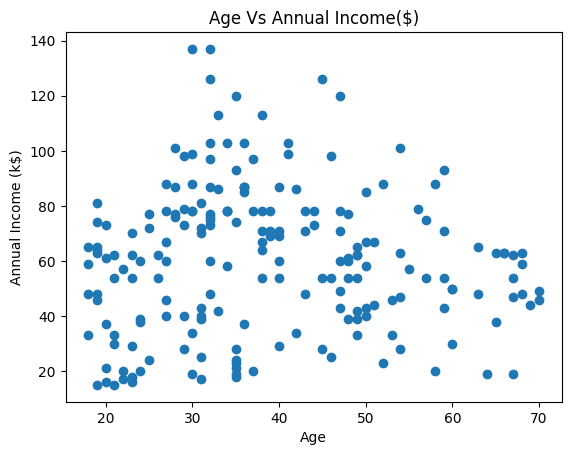

In [ ]:
x=df['Age']
y=df['Annual Income (k$)']
plt.scatter(x,y)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Age Vs Annual Income($)")

Text(0, 0.5, 'spending_score')

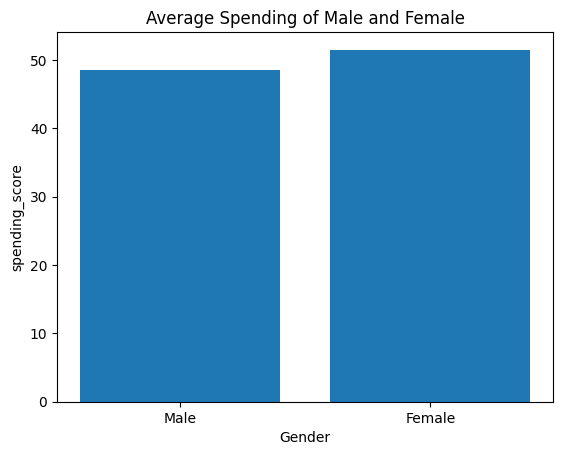

In [ ]:
maleDF=df.query("Gender==1")
femaleDF=df.query("Gender==0")
avgMaleSpend=maleDF['Spending Score (1-100)'].mean()
avgFemaleSpend=femaleDF['Spending Score (1-100)'].mean()
x=['Male','Female']
y=[avgMaleSpend,avgFemaleSpend]
plt.bar(x,y)
plt.title("Average Spending of Male and Female")
plt.xlabel("Gender")
plt.ylabel("spending_score")




Text(0.5, 1.0, 'Average Income Vs Gender')

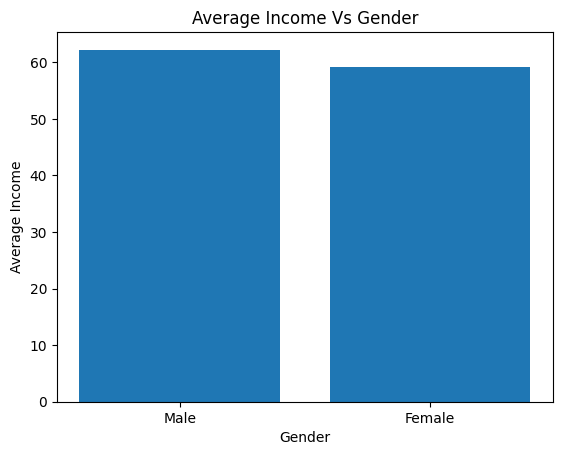

In [ ]:
avgMaleIncome = maleDF['Annual Income (k$)'].mean()
avgFemaleIncome = femaleDF['Annual Income (k$)'].mean()
x=["Male","Female"]
plt.bar(x,[avgMaleIncome,avgFemaleIncome])
plt.ylabel("Average Income")
plt.xlabel("Gender")
plt.title('Average Income Vs Gender')

Text(0.5, 1.0, 'Gender Vs Count')

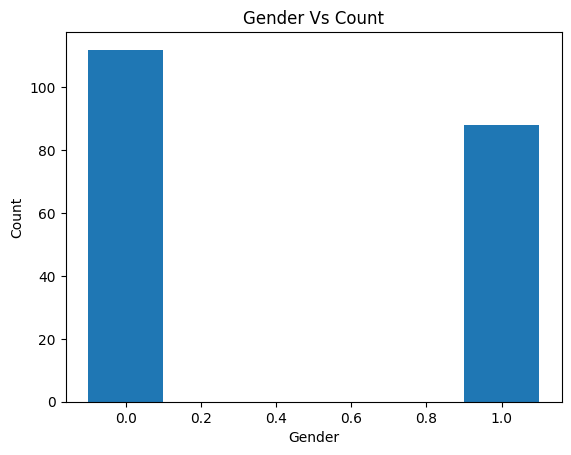

In [ ]:
x=df['Gender'].value_counts().index
y=df['Gender'].value_counts().values
plt.xlabel("Gender")
plt.ylabel("Count")
plt.bar(x,y, width=0.2, align='center')
plt.title("Gender Vs Count")

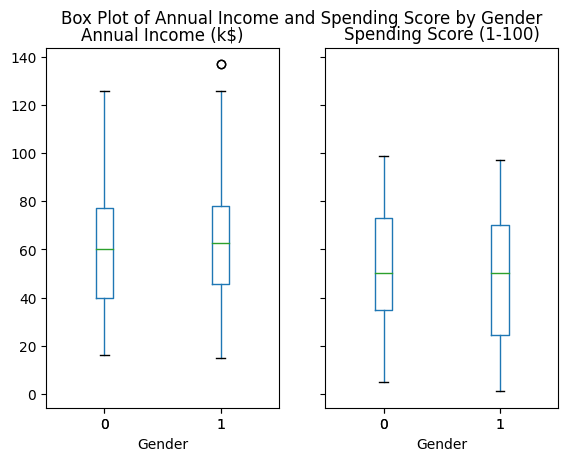

In [ ]:
df.boxplot(column=['Annual Income (k$)', 'Spending Score (1-100)'], by='Gender', grid=False)
plt.suptitle('Box Plot of Annual Income and Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Value')
plt.show()

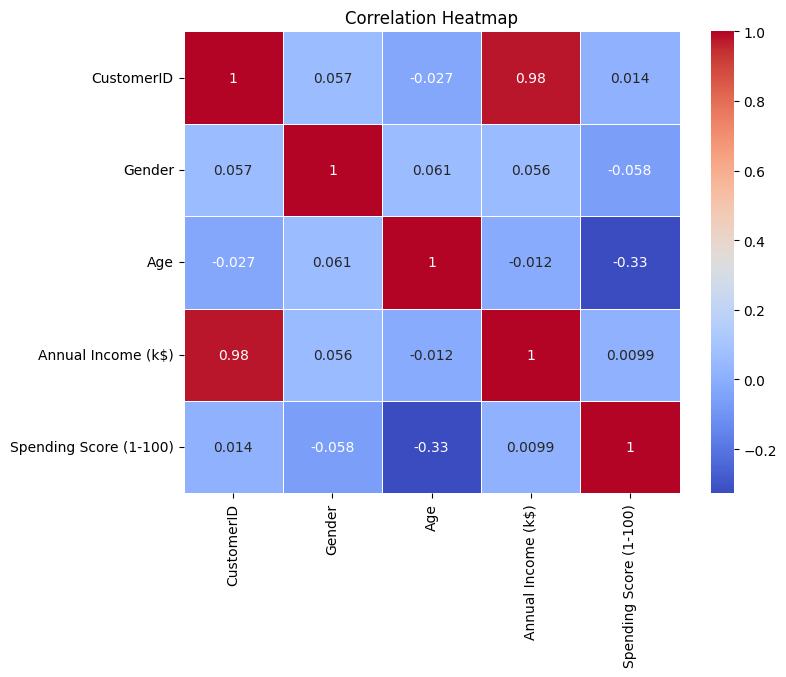

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Customize the plot (optional)
plt.title('Correlation Heatmap')
plt.show()


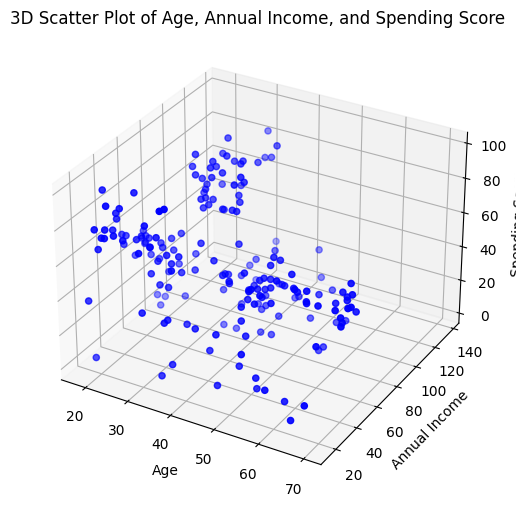

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = df['Age']
y = df['Annual Income (k$)']
z = df['Spending Score (1-100)']

ax.scatter(x, y, z, c='b', marker='o')

# Customize the plot (optional)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('3D Scatter Plot of Age, Annual Income, and Spending Score')

plt.show()

# Feature Engineering

In [ ]:
df['Income per Age Group'] = df['Annual Income (k$)'] / df['Age']


In [ ]:
df['Spending Score Group'] = pd.cut(df['Spending Score (1-100)'], bins=[0,10, 20, 40, 60, 80, 100], labels=['<10','20-30', '20-40', '40-60', '60-80', '80-100'])

In [ ]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, float('inf')], labels=['<20', '20-30', '30-40', '40-50', '50-60', '60+'])

In [ ]:
print(df.to_markdown())

|     |   CustomerID |   Gender |   Age |   Annual Income (k$) |   Spending Score (1-100) |   Income per Age Group | Spending Score Group   | Age Group   |
|----:|-------------:|---------:|------:|---------------------:|-------------------------:|-----------------------:|:-----------------------|:------------|
|   0 |            1 |        1 |    19 |                   15 |                       39 |               0.789474 | 20-40                  | <20         |
|   1 |            2 |        1 |    21 |                   15 |                       81 |               0.714286 | 80-100                 | 20-30       |
|   2 |            3 |        0 |    20 |                   16 |                        6 |               0.8      | <10                    | <20         |
|   3 |            4 |        0 |    23 |                   16 |                       77 |               0.695652 | 60-80                  | 20-30       |
|   4 |            5 |        0 |    31 |                   17 |

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income per Age Group,Spending Score Group,Age Group
0,1,1,19,15,39,0.789474,20-40,<20
1,2,1,21,15,81,0.714286,80-100,20-30
2,3,0,20,16,6,0.800000,<10,<20
3,4,0,23,16,77,0.695652,60-80,20-30
4,5,0,31,17,40,0.548387,20-40,30-40


# Machine Learning Algorithm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

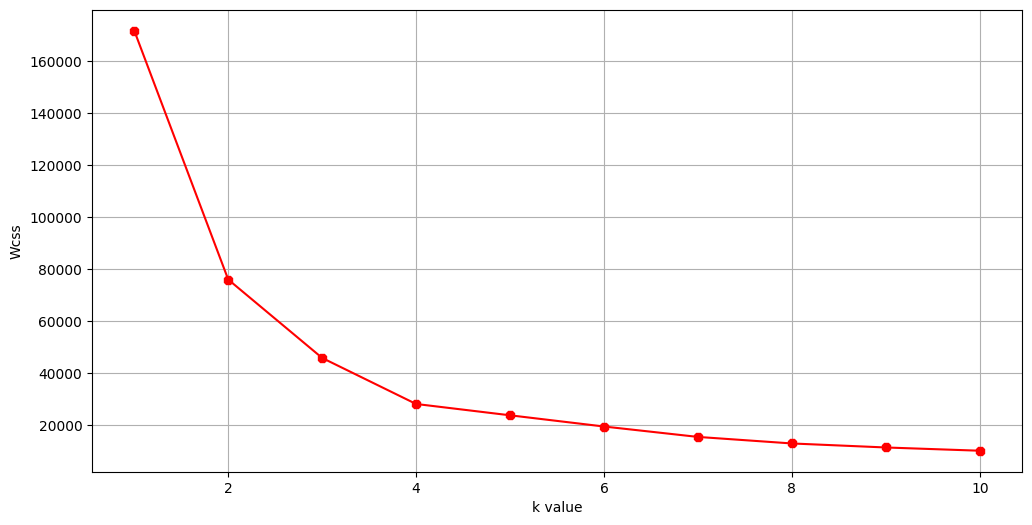

In [ ]:
data= df.loc[:,['Age','Spending Score (1-100)']].values
wcss=[]
from sklearn.cluster import KMeans

for k in range(1,11):
  k_means= KMeans(k,init='k-means++')
  k_means.fit(data)
  wcss.append(k_means.inertia_)

plt.figure(figsize=(12,6))
plt.grid()

plt.plot(range(1,11),wcss,color="red",marker="8")

plt.xlabel("k value")
plt.ylabel("Wcss")


plt.show()

In [ ]:
kmeans=KMeans(n_clusters=4)

label = kmeans.fit_predict(data)
print(label)

[3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print("age vs spending score Cluster_centroids_cooridinates\n",kmeans.cluster_centers_)

age vs spending score Cluster_centroids_cooridinates
 [[55.70833333 48.22916667]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]]


Text(0, 0.5, 'Spending score')

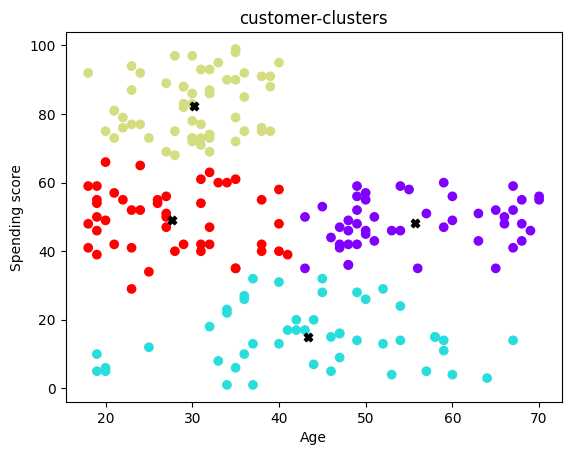

In [ ]:
plt.scatter(data[:,0],data[:,1],c=label,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black",marker="X")
plt.title("customer-clusters")
plt.xlabel("Age")
plt.ylabel("Spending score")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

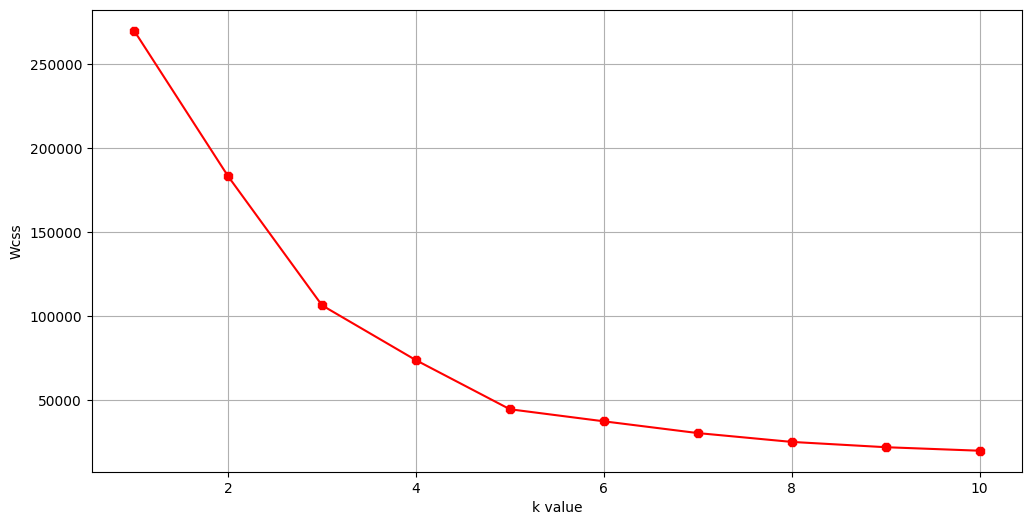

In [ ]:
data2= df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values
wcss=[]
from sklearn.cluster import KMeans

for k in range(1,11):
  k_means= KMeans(k,init='k-means++')
  k_means.fit(data2)
  wcss.append(k_means.inertia_)

plt.figure(figsize=(12,6))
plt.grid()

plt.plot(range(1,11),wcss,color="red",marker="8")

plt.xlabel("k value")
plt.ylabel("Wcss")


plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters=5)

label2 = kmeans2.fit_predict(data2)

print(label2)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 2 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 4 0 2 0 4 0 4 0 2 0 4 0 4 0 4 0 4 0 2 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print("annual income vs spending score Cluster_centroids_cooridinates\n",kmeans2.cluster_centers_)

annual income vs spending score Cluster_centroids_cooridinates
 [[86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [88.2        17.11428571]]


Text(0, 0.5, 'Spending score')

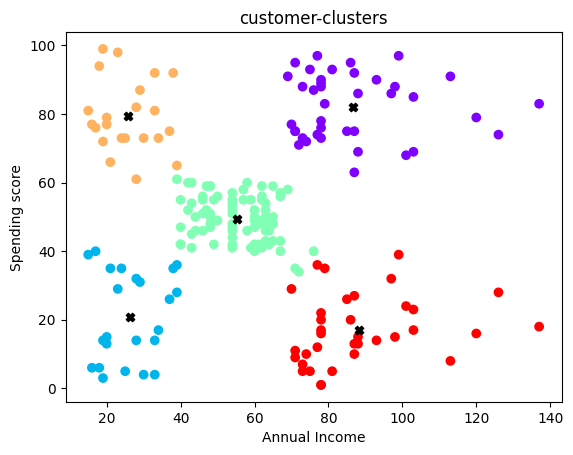

In [ ]:
plt.scatter(data2[:,0],data2[:,1],c=label2,cmap="rainbow")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="black",marker="X")
plt.title("customer-clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

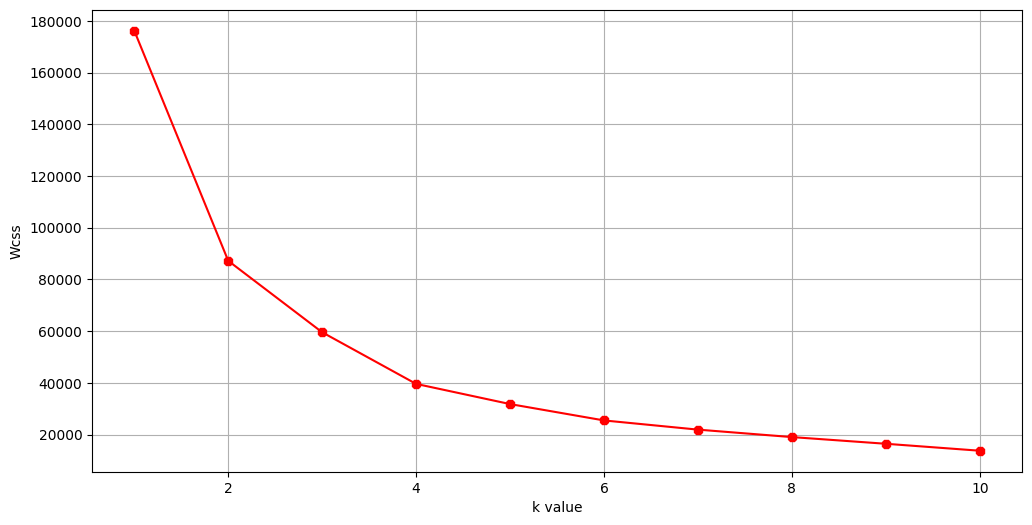

In [ ]:
data3= df.iloc[:,1:4]
wcss=[]
from sklearn.cluster import KMeans

for k in range(1,11):
  k_means= KMeans(k,init='k-means++')
  k_means.fit(data3)
  wcss.append(k_means.inertia_)

plt.figure(figsize=(12,6))
plt.grid()

plt.plot(range(1,11),wcss,color="red",marker="8")

plt.xlabel("k value")
plt.ylabel("Wcss")

plt.show()


In [ ]:
kmeans3 = KMeans(n_clusters=5)

label3 = kmeans3.fit_predict(data3)
print(label3)

[4 4 4 4 4 4 4 4 0 4 0 4 0 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 0 4 0 4 0 4 4
 4 4 4 0 4 0 4 0 4 0 4 4 4 0 4 4 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 1 2 2 2 0 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


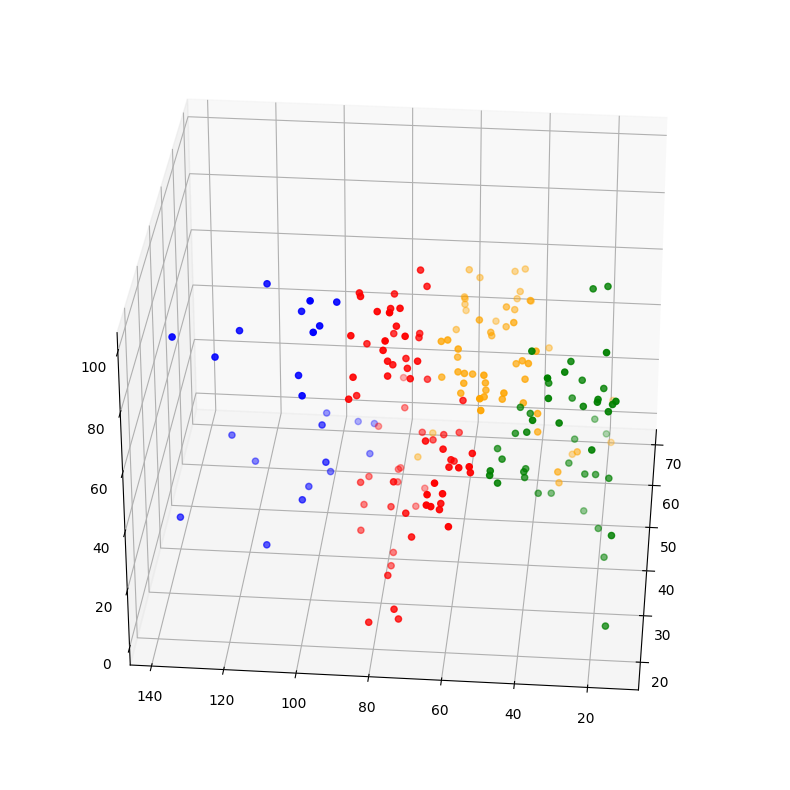

In [ ]:
clusters=kmeans.fit_predict(data3)
df["label"]=clusters
from mpl_toolkits.mplot3d import Axes3D

fig =plt.figure(figsize=(20,10))
ax =fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label ==0],df["Annual Income (k$)"][df.label==0], df["Spending Score (1-100)"][df.label==0],c='blue')
ax.scatter(df.Age[df.label ==1],df["Annual Income (k$)"][df.label==1 ],df["Spending Score (1-100)"][df.label==1],c='red')
ax.scatter(df.Age[df.label ==2],df["Annual Income (k$)"][df.label==2 ],df["Spending Score (1-100)"][df.label==2],c='green')
ax.scatter(df.Age[df.label ==3],df["Annual Income (k$)"][df.label==3], df["Spending Score (1-100)"][df.label==3],c='orange')
ax.scatter(df.Age[df.label ==4],df["Annual Income (k$)"][df.label==4], df["Spending Score (1-100)"][df.label==4],c='purple')
ax.view_init(30,185)



---

